# **MÓDULO 27 - Projeto de Doenças Cardiovasculares - Regressão Logística**


Assim como na aula que trabalhamos com uma base de dados nova, com um contexto de modelo de propensão a compra de carros, para a atividade de vocês achei interessante trazer também novos desafios.

Nessa tarefa iremos construir um modelo que nos ajude a prever doenças cardiovasculares, a base contém dados reais.

age - idade dos pacientes

gender - genero (2 mulheres) (1 homens)

height - altura dos pacientes

weight - peso dos pacientes

gluc - glicose

smoke - fumante (1) não fumante (0)

alco - consume alcool (1) não consome (0)

active - realiza atividades fisicas (1) não realiza (0)

cardio_disease - tem doença cardio (1) não tem (0) - Variável target


Seu objetivo é utilizar esses dados históricos dos pacientes e construir um bom modelo de regressão capaz de indicar se novos pacientes estão propensos a doenças cariovasculares ou não.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

# 1) Comece carregando e tratando a base de dados.
Assim como na aula essa nova base não passou por pré processamento nenhum então nessa etapa, carrega os dados, verifique os tipos de dados, verifique se temos dados faltantes e outliers.
Quando necessário realize o tratamento.


In [6]:
base = pd.read_csv("CARDIO_BASE.csv", delimiter=';')

In [7]:
base

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
0,50,2,168,62,1,1,0,0,1,0
1,55,1,156,85,3,1,0,0,1,1
2,52,1,165,64,3,1,0,0,0,1
3,48,2,169,82,1,1,0,0,1,1
4,48,1,156,56,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,56,1,166,65,1,1,0,0,0,0
9996,50,1,160,93,2,1,0,0,1,1
9997,40,1,158,66,2,2,0,0,1,0
9998,50,1,168,70,3,1,0,0,1,1


In [8]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   gender          10000 non-null  int64 
 2   height          10000 non-null  int64 
 3   weight          10000 non-null  object
 4   cholesterol     10000 non-null  int64 
 5   gluc            10000 non-null  int64 
 6   smoke           10000 non-null  int64 
 7   alco            10000 non-null  int64 
 8   active          10000 non-null  int64 
 9   cardio_disease  10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB


In [12]:
base['weight'] = (
    base['weight']
        .astype(str)
        .str.replace(',', '.', regex=False)
        .astype(float)
)



In [13]:
base.describe()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.288300,1.345400,164.308200,74.303710,1.365000,1.222200,0.089000,0.053700,0.797200,0.503100
std,6.796234,0.475522,8.178796,14.566353,0.677658,0.565561,0.284758,0.225436,0.402105,0.500015
min,30.000000,1.000000,70.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,82.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             10000 non-null  int64  
 1   gender          10000 non-null  int64  
 2   height          10000 non-null  int64  
 3   weight          10000 non-null  float64
 4   cholesterol     10000 non-null  int64  
 5   gluc            10000 non-null  int64  
 6   smoke           10000 non-null  int64  
 7   alco            10000 non-null  int64  
 8   active          10000 non-null  int64  
 9   cardio_disease  10000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 781.4 KB


# 2) Agora é hora de explorar os dados com uma análise bem completa.
Plote pelo menos 3 gráficos analisando o comportamento da variável cardio com outras variaveis da sua preferência (análise bivariada). Não se esqueça de trazer insights acerca do analisado.


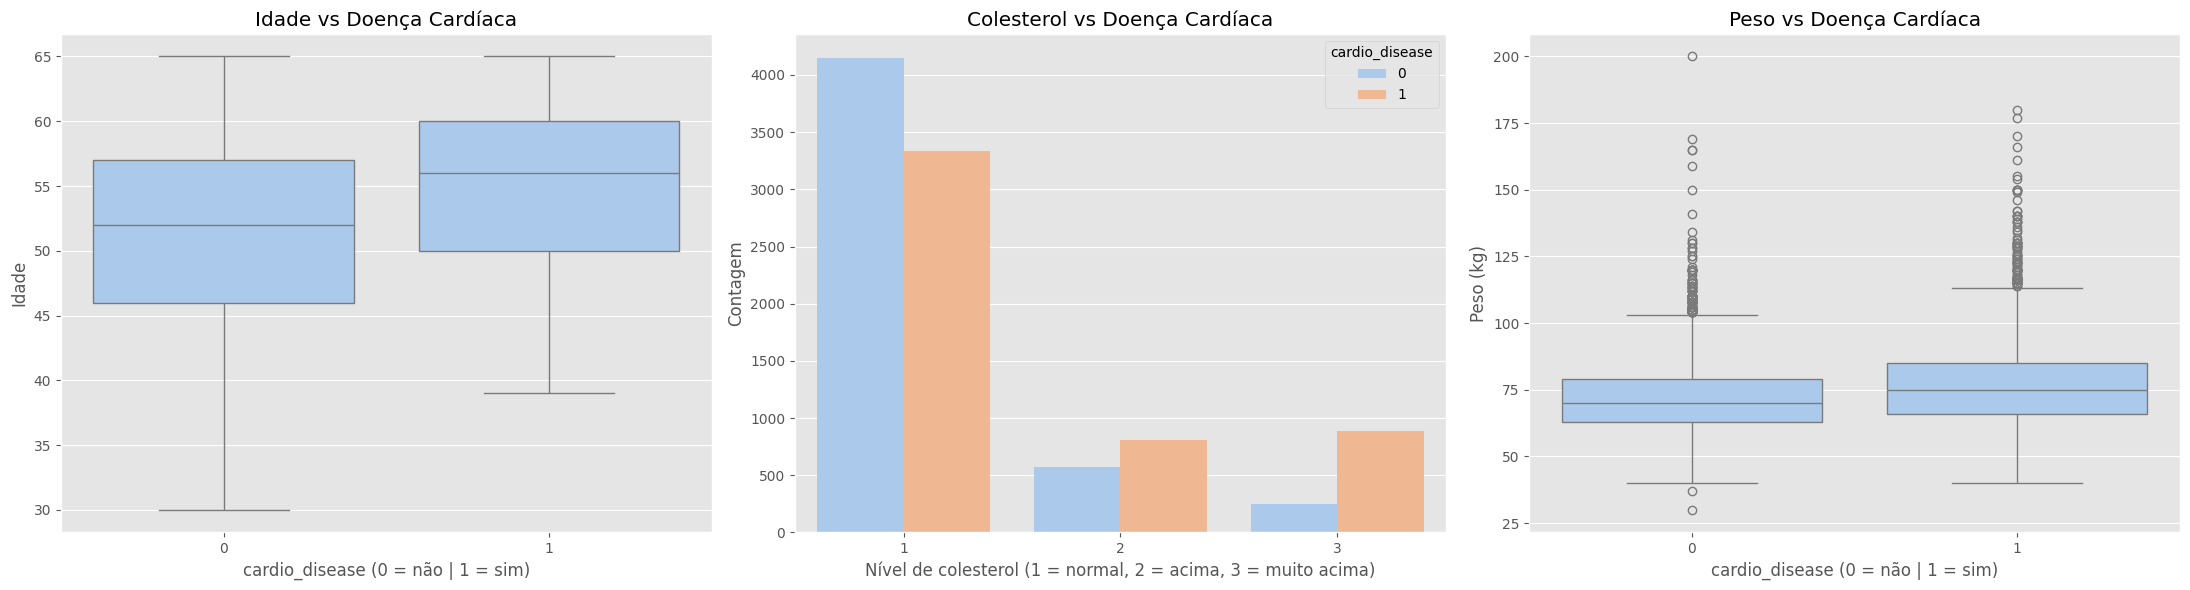

In [15]:
plt.style.use("ggplot")
sns.set_palette("pastel")

fig, axs = plt.subplots(1, 3, figsize=(22, 6))


# 1) Idade vs cardio_disease
sns.boxplot(x="cardio_disease", y="age", data=base, ax=axs[0])
axs[0].set_title("Idade vs Doença Cardíaca")
axs[0].set_xlabel("cardio_disease (0 = não | 1 = sim)")
axs[0].set_ylabel("Idade")


# 2) Colesterol vs cardio_disease
sns.countplot(x="cholesterol", hue="cardio_disease", data=base, ax=axs[1])
axs[1].set_title("Colesterol vs Doença Cardíaca")
axs[1].set_xlabel("Nível de colesterol (1 = normal, 2 = acima, 3 = muito acima)")
axs[1].set_ylabel("Contagem")


# 3) Peso vs cardio_disease
sns.boxplot(x="cardio_disease", y="weight", data=base, ax=axs[2])
axs[2].set_title("Peso vs Doença Cardíaca")
axs[2].set_xlabel("cardio_disease (0 = não | 1 = sim)")
axs[2].set_ylabel("Peso (kg)")


plt.tight_layout()
plt.show()

## Insights

- **Idade**: indivíduos com doença cardíaca tendem a ser mais velhos.  
- **Colesterol**: níveis 2 e 3 apresentam maior concentração de casos positivos.  
- **Peso**: grupo com doença mostra pesos mais elevados em média.  


# 3) Nessa etapa você deve trazer a matriz de correlação e apontar insights acerca das variáveis com um relacionamento mais forte entre si.



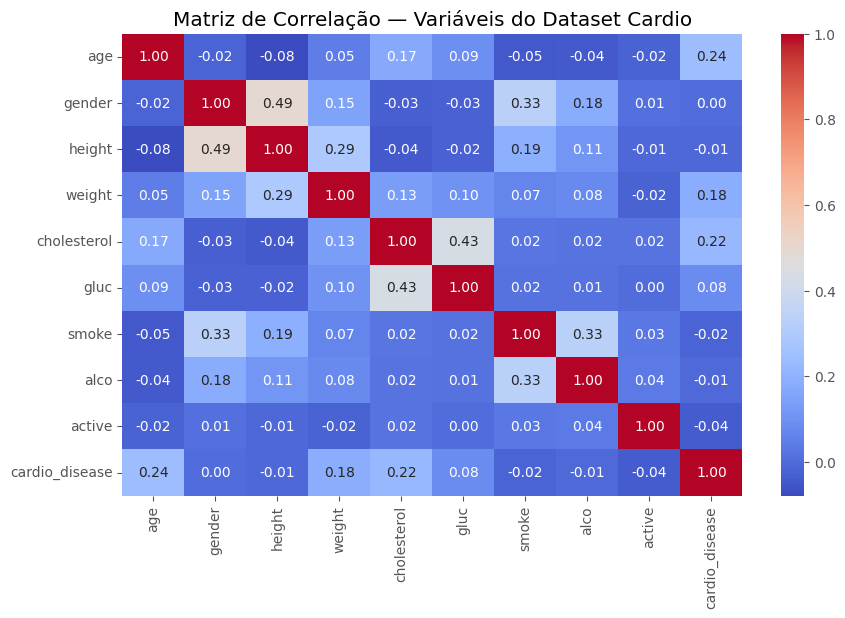

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(base.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação — Variáveis do Dataset Cardio")
plt.show()

Principais insights da matriz de correlação:

1. A variável age apresenta a correlação mais alta com cardio_disease (0.24). A idade é o fator que mais se relaciona com a presença da doença.

2. As variáveis cholesterol (0.22) e weight (0.18) também possuem correlação positiva com cardio_disease. Indivíduos com colesterol mais alto e maior peso tendem a aparecer mais no grupo doente.

3. A variável gluc possui correlação moderada com cholesterol (0.43), indicando que níveis altos de glicose costumam ocorrer junto de colesterol elevado.

4. A variável gender apresenta uma correlação bem alta com height (0.49), o que faz sentido considerando diferenças biológicas de estatura entre gêneros.

5. Fatores como smoke, alco e active possuem correlações muito fracas com cardio_disease, sugerindo baixa influência direta dessas variáveis no desfecho do dataset.

6. No geral, os fatores mais relevantes para investigar risco cardíaco nesse conjunto de dados são: idade, colesterol, peso e glicemia.


# 4) Essa é a sua última etapa pré modelo. Você deve:

A) Separar a base em treino e teste.

B) Você considera que essa base precisa que os dados sejam padronizados? Se sim, porque? Se acredita que devem, então realize essa etapa.

C) Verifique se os dados estão balanceados, se não, faça o balanceamento.


D) Visualize as bases de treino, teste (X E Y) e verifique se está tudo adequado.

Distribuição original da variável alvo:
cardio_disease
1    0.503125
0    0.496875
Name: proportion, dtype: float64


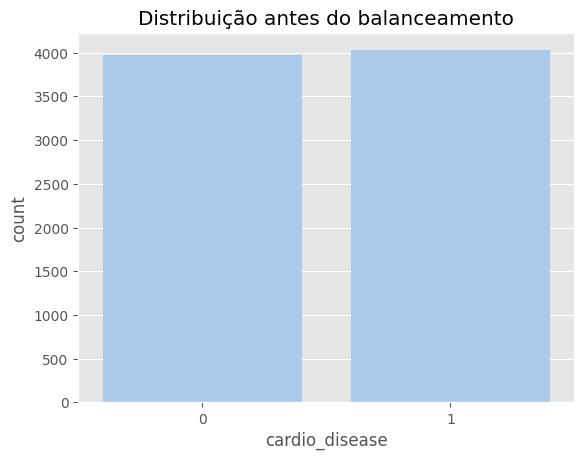


Distribuição após SMOTE:
cardio_disease
1    0.5
0    0.5
Name: proportion, dtype: float64


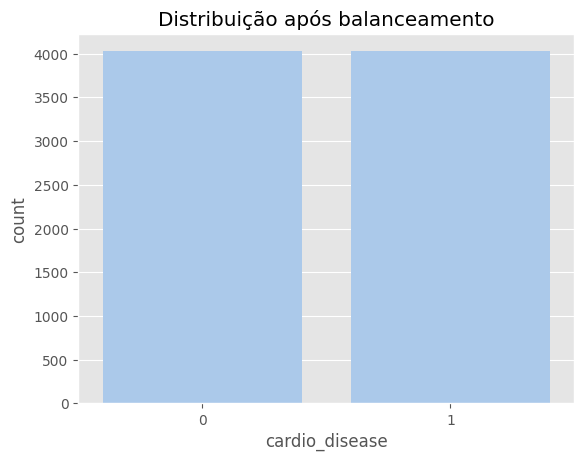

FORMATO DAS BASES:
X_train_bal: (8050, 9)
y_train_bal: (8050,)
X_test_scaled: (2000, 9)
y_test: (2000,)

Primeiras linhas de X_train_balanceado:
        age    gender    height    weight  cholesterol      gluc     smoke  \
0 -0.191322 -0.723546  0.694153 -0.300949      -0.5425 -0.394734 -0.314005   
1 -0.485891  1.382081  1.304210 -0.506056      -0.5425 -0.394734 -0.314005   
2 -0.485891 -0.723546 -0.525961 -0.027472      -0.5425 -0.394734 -0.314005   
3 -1.075027  1.382081 -0.769983 -0.506056      -0.5425 -0.394734  3.184660   
4  0.692383  1.382081  1.182199 -0.300949      -0.5425  1.372402 -0.314005   

       alco    active  
0 -0.239212  0.503513  
1  4.180401  0.503513  
2 -0.239212  0.503513  
3  4.180401  0.503513  
4 -0.239212 -1.986045  

Primeiras linhas de y_train_balanceado:
0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    0
8    1
9    0
Name: cardio_disease, dtype: int64


In [18]:
# Separar a base em treino e teste
X = base.drop(columns=['cardio_disease'])
y = base['cardio_disease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Padronização dos dados
# Justificativa: variáveis em escalas diferentes
# (idade, altura, peso, colesterol, etc.)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar balanceamento e aplicar SMOTE
print("Distribuição original da variável alvo:")
print(y_train.value_counts(normalize=True))

sns.countplot(x=y_train)
plt.title("Distribuição antes do balanceamento")
plt.show()

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_scaled, y_train)

print("\nDistribuição após SMOTE:")
print(y_train_bal.value_counts(normalize=True))

sns.countplot(x=y_train_bal)
plt.title("Distribuição após balanceamento")
plt.show()

# Visualização das bases finais

print("FORMATO DAS BASES:")
print("X_train_bal:", X_train_bal.shape)
print("y_train_bal:", y_train_bal.shape)
print("X_test_scaled:", X_test_scaled.shape)
print("y_test:", y_test.shape)

print("\nPrimeiras linhas de X_train_balanceado:")
print(pd.DataFrame(X_train_bal, columns=X.columns).head())

print("\nPrimeiras linhas de y_train_balanceado:")
print(y_train_bal[:10])


A base foi dividida em treino e teste com estratificação. Como as variáveis estão em escalas diferentes, foi realizada padronização. A variável alvo estava quase balanceada, mas o SMOTE foi aplicado para garantir equilíbrio total no treino. As dimensões das bases finais ficaram adequadas e os dados padronizados foram confirmados visualmente.


# 5) Realize a etapa de treinamento do modelo:

A) Faça o treinamento do modelo.

B) Traga o intercept e os coeficientes.

c) Avalie as métricas do modelo treinado

D) Justifique se te parece que o modelo tem feito boas previsões ou não.

In [20]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Treinar o modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train_bal, y_train_bal)

# Intercepto e coeficientes
intercepto = modelo.intercept_
coeficientes = modelo.coef_

print("Intercepto:", intercepto)
print("\nCoeficientes por variável:")
for nome, coef in zip(X.columns, coeficientes[0]):
    print(f"{nome}: {coef:.4f}")

# Avaliar métricas
y_pred = modelo.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)
relatorio = classification_report(y_test, y_pred)

print("\nAcurácia:", acc)
print("\nMatriz de confusão:\n", matriz)
print("\nRelatório de classificação:\n", relatorio)


Intercepto: [0.01578505]

Coeficientes por variável:
age: 0.4350
gender: 0.0090
height: -0.0937
weight: 0.3765
cholesterol: 0.4110
gluc: -0.0677
smoke: -0.0208
alco: -0.0082
active: -0.0801

Acurácia: 0.642

Matriz de confusão:
 [[677 317]
 [399 607]]

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.63      0.68      0.65       994
           1       0.66      0.60      0.63      1006

    accuracy                           0.64      2000
   macro avg       0.64      0.64      0.64      2000
weighted avg       0.64      0.64      0.64      2000



O modelo foi treinado usando regressão logística. A idade, o peso e o colesterol apareceram como principais variáveis associadas à doença cardíaca. A acurácia ficou em torno de 0.64 e os f1-scores indicam desempenho moderado. O modelo acerta uma parte relevante dos casos, mas ainda apresenta limitações e não separa as classes com alta precisão.


# 6) Teste seu modelo!

A) Aplique o modelo aos dados de teste.

B) Avalie as métricas do modelo treinado

C) Plote o gráfico da curva AUC-ROC e explique o que consegue analisar através do gráfico.

Acurácia: 0.642

Matriz de Confusão:
 [[677 317]
 [399 607]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.63      0.68      0.65       994
           1       0.66      0.60      0.63      1006

    accuracy                           0.64      2000
   macro avg       0.64      0.64      0.64      2000
weighted avg       0.64      0.64      0.64      2000



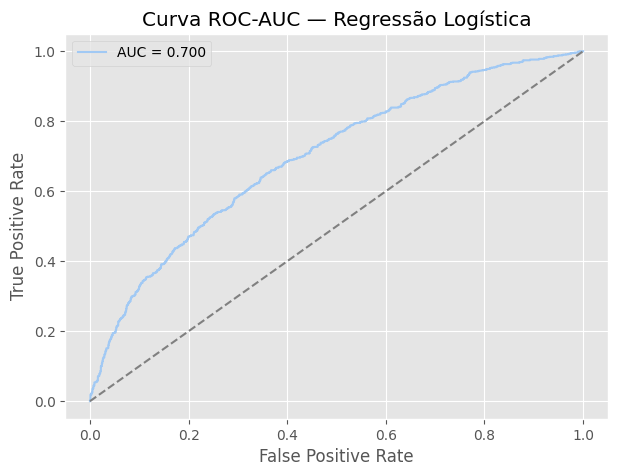


AUC = 0.6995141825105704


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# A) Aplicar o modelo aos dados de teste
y_pred = modelo.predict(X_test_scaled)
y_proba = modelo.predict_proba(X_test_scaled)[:, 1]

# B) Avaliar métricas
acc = accuracy_score(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)
rel = classification_report(y_test, y_pred)

print("Acurácia:", acc)
print("\nMatriz de Confusão:\n", matriz)
print("\nRelatório de Classificação:\n", rel)

# C) Curva ROC-AUC
fpr, tpr, limiar = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC-AUC — Regressão Logística")
plt.legend()
plt.show()

print("\nAUC =", roc_auc)


O modelo foi aplicado ao conjunto de teste e apresentou acurácia em torno de 0.64. A matriz de confusão e o classification report indicam desempenho moderado, com f1-scores parecidos para as duas classes. A curva ROC-AUC mostrou valor intermediário, acima da linha aleatória, indicando que o modelo consegue distinguir as classes até certo ponto, mas ainda com capacidade limitada de separação.


# 7) Explique:

A) Explique com suas palavras regressão logistica.

B) Explique porque a regressão logistica é um modelo de classificação.

C) Explique quais pontos em comum a regressão logistica tem da regressão linear.



A) O que é regressão logística

A regressão logística é um modelo criado para responder perguntas do tipo “sim ou não”. A ideia central é simples: o modelo pega as variáveis que você fornece, combina tudo em uma expressão linear e, em vez de entregar um número qualquer, passa esse resultado pela função sigmoide. Essa função comprime tudo para um intervalo entre 0 e 1, permitindo interpretar a saída como probabilidade. Assim, o modelo basicamente diz: “dado esse conjunto de características, qual é a chance de isso ser a classe 1?”.

B) Por que ela é um modelo de classificação

Mesmo tendo o nome “regressão”, o objetivo dela não é prever valores contínuos. A saída sempre é uma probabilidade, que depois é transformada em uma classe. Quando a probabilidade é maior que um valor limite (geralmente 0.5), classificamos como 1; quando é menor, classificamos como 0. Por isso ela é usada para classificar, não para prever números. A etapa de regressão acontece só internamente, para calcular o escore que será transformado em probabilidade.

C) Semelhanças com a regressão linear

As duas começam da mesma base matemática: uma combinação linear das variáveis com seus coeficientes. Ambas aprendem esses coeficientes a partir dos dados e tentam minimizar erros durante o treinamento. A diferença fundamental é o que fazem com esse resultado: na regressão linear, o valor final é usado diretamente como previsão; na logística, esse valor passa pela sigmoide para virar probabilidade. Em outras palavras, a estrutura inicial é a mesma, mas o propósito final muda completamente.